<a href="https://colab.research.google.com/github/abhiraj-mengade/House_of_MDs/blob/main/Science%20%26%20Computation/1.%20Chemical%20Kinetics/Consecutive_and_Parallel_Chemical_Kinetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***************************************************************

***************************************************************
##$\text{Visualization of Consecutive and Parallel Chemical Reaction Kinetics}$

####$\text{Notebook by: } Abhiraj\ Mengade$

In [16]:
#1.1 Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Cosecutive Reaction
The Reaction:  
$\text{A} \overset{k_1}{\longrightarrow} \text{B} \overset{k_2}{\longrightarrow} \text{C}$

<br>



Reaction Rates:

<br>
$\dfrac{d \left[ \text{A} \right]}{dt} = -k_1 \left[ \text{A} \right]$ <br>

$\dfrac{d \left[ \text{B} \right]}{dt} = k_1 \left[ \text{A} \right] - k_2 \left[ \text{B} \right]$<br>

$\dfrac{d \left[ \text{C} \right]}{dt} = k_2 \left[ \text{B} \right]$<br>

In [ ]:
#2.1 Defining the Equations of Consecutive Reactions
#y=[A,B,C], K=[k1,k2]
def f(t, y, k):
    dydt =[-k[0]*y[0],k[0]*y[0]-k[1]*y[1] , k[1]*y[1]]
    return dydt

In [ ]:
#2.2 Define time spans, initial values, and constants
tspan = np.linspace(0, 10, 100) 
yinit = [5, 1, 0]
k = [0.8, 0.6]


In [ ]:
#2.3 Solving differential equation
sol = solve_ivp(lambda t, y: f(t, y, k), 
                [tspan[0], tspan[-1]], yinit, t_eval=tspan, rtol = 1e-5)

###$\text{Equations attained after solving DE:}$

$\left[ \text{A} \right] = \left[ \text{A} \right]_0 e^{-k_1 t}$


$\left[ \text{B} \right] = \dfrac{k_1 \left[ \text{A} \right]_0}{k_2 - k_1} \left( e^{-k_1 t} - e^{-k_2 t} \right)$


$\left[ \text{C} \right] = \left[ \text{A} \right]_0 \left[ 1 + \dfrac{1}{k_1 - k_2} \left( k_2 e^{-k_1 t} - k_1 e^{-k_2 t} \right) \right]$


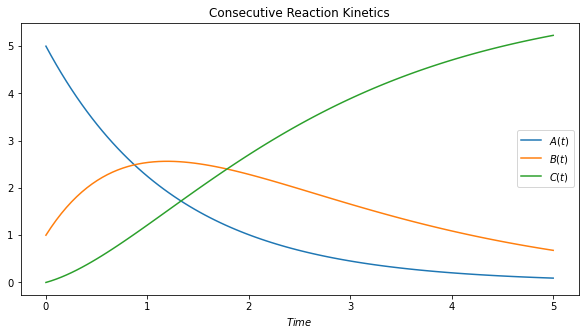

In [26]:
#2.4 Plotting the Graphs
Labels=["A","B","C"]
plt.figure(figsize=(10,5)) 
for i in range(sol.y.shape[0]):
    plt.plot(sol.t, sol.y[i], label=f'${Labels[i]}(t)$')
plt.title("Consecutive Reaction Kinetics")
plt.xlabel('$Time$')
plt.ylabel('$Concentration$')  
plt.legend() 
plt.show()

***************************************************************

***************************************************************

#Parallel Reaction
The Reaction:
\begin{align} \text{A} &\overset{k_1}{\rightarrow} \text{B} \\ \text{A} &\overset{k_2}{\rightarrow} \text{C} \end{align}
 
Reaction Rates:

$\dfrac{d \left[ \text{A} \right]}{dt} = -k_1 \left[ \text{A} \right] - k_2 \left[ \text{A} \right] = - \left( k_1 + k_2 \right) \left[ \text{A} \right]$


$\dfrac{d \left[ \text{B} \right]}{dt} = k_1 \left[ \text{A} \right]$


$\dfrac{d \left[ \text{C} \right]}{dt} = k_2 \left[ \text{A} \right]$




In [36]:
#3.1 Defining the Equations of Parallel Reactions
#y=[A,B,C], K=[k1,k2]
def f(t, y, k):
    dydt =[-(k[0]+c[1])*y[0],k[0]*y[0], k[1]*y[0]]
    return dydt

In [37]:
#3.2 Define time spans, initial values, and constants (Parallel Reaction)
tspan = np.linspace(0, 10, 100) 
yinit = [19, 1, 0]
k = [0.8, 0.6]

In [38]:
#3.3 Solving differential equation
sol = solve_ivp(lambda t, y: f(t, y, k), 
                [tspan[0], tspan[-1]], yinit, t_eval=tspan, rtol = 1e-5)

###$\text{Equations attained after solving DE:}$

$\left[ \text{A} \right] = \left[ \text{A} \right]_0 e^{-\left( k_1 + k_2 \right) t}$


$\left[ \text{B} \right] = \dfrac{k_1 \left[ \text{A} \right]_0}{k_1 + k_2} \left( 1 - e^{-\left( k_1 + k_2 \right) t} \right)$


$\left[ \text{C} \right] = \dfrac{k_2 \left[ \text{A} \right]_0}{k_1 + k_2} \left( 1 - e^{-\left( k_1 + k_2 \right) t} \right) $

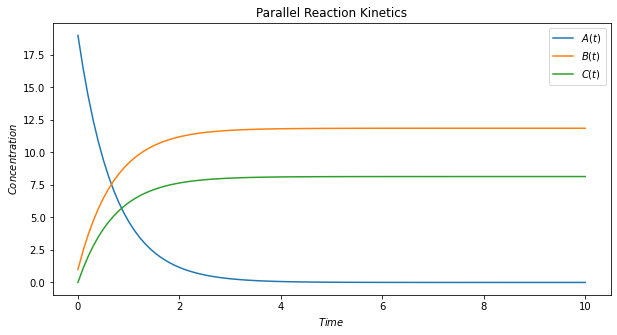

In [39]:
#3.4 Plotting the Graphs
Labels=["A","B","C"]
plt.figure(figsize=(10,5)) 
for i in range(sol.y.shape[0]):
    plt.plot(sol.t, sol.y[i], label=f'${Labels[i]}(t)$')
plt.title("Parallel Reaction Kinetics")
plt.xlabel('$Time$') 
plt.ylabel('$Concentration$')  
plt.legend() 
plt.show()

##$References:$
More Complex Reactions. (2019, May 11). Retrieved September 1, 2021, from https://chem.libretexts.org/@go/page/41344